In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv('perrin-freres-monthly-champagne.csv',
                 index_col='Month',
                 skipfooter=2,
                 parse_dates=True)

/Users/maria/opt/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [5]:
df.head()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [6]:
df.columns = ['Sales']

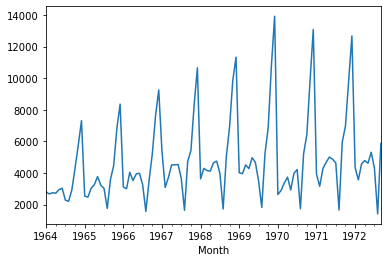

In [7]:
df['Sales'].plot();

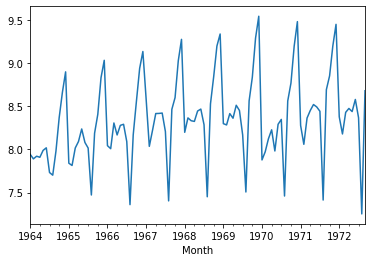

In [8]:
df['LogSales'] = np.log(df['Sales'])
df['LogSales'].plot();

In [9]:
df.index.freq = 'MS'

In [10]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [11]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [12]:
import pmdarima as pm

In [13]:
model = pm.auto_arima(train['LogSales'],
                      trace=True,
                      suppress_warnings=True,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-50.478, Time=0.80 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-41.975, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-54.968, Time=0.13 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-53.384, Time=0.15 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-34.700, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-44.102, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-52.971, Time=0.61 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=-52.991, Time=0.24 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-55.117, Time=0.16 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=-53.123, Time=0.40 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-50.817, Time=0.11 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=-56.123, Time=0.23 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=-44.178, Time=0.05 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   

In [14]:
train_pred = model.predict_in_sample(start=12, end=-1)
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

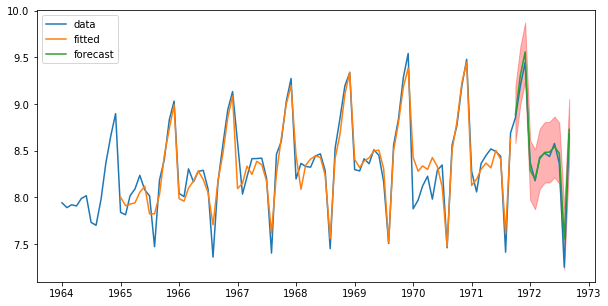

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df['LogSales'], label='data')
ax.plot(train.index[12:],train_pred,label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index,
                confint[:,0], confint[:,1],
                color='red',alpha=0.3)
ax.legend()

In [17]:
# Best non-seasonal model
model = pm.auto_arima(train['LogSales'],
                      trace=True,
                      max_p=12, max_q=2, max_order=14,
                      suppress_warnings=True,
                      stepwise=False,
                      seasonal=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=141.911, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=141.540, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=139.851, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=138.023, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=114.336, Time=0.07 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=114.576, Time=0.11 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=114.173, Time=0.08 

In [18]:
train_pred = model.predict_in_sample(start=1, end=-1)
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

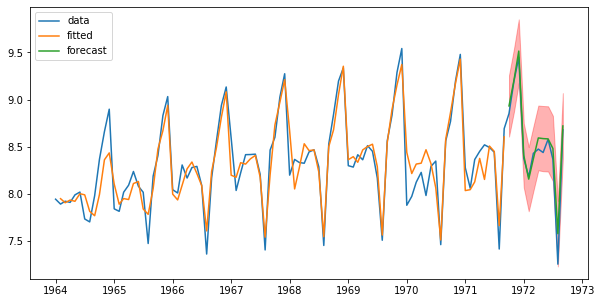

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df['LogSales'], label='data')
ax.plot(train.index[1:],train_pred,label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index,
                confint[:,0], confint[:,1],
                color='red',alpha=0.3)
ax.legend()

In [22]:
r2_score(test['Sales'], np.exp(test_pred))

0.9719378009349805

In [23]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

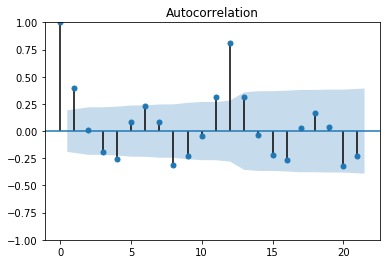

In [24]:
plot_acf(df['LogSales']);

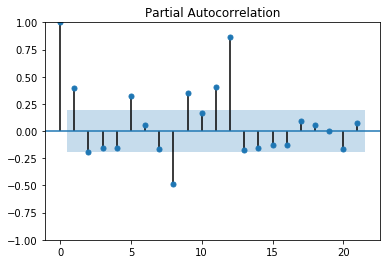

In [29]:
plot_pacf(df['LogSales'], method='ols');

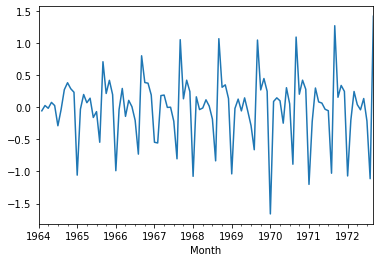

In [31]:
df['LogSales'].diff().plot();

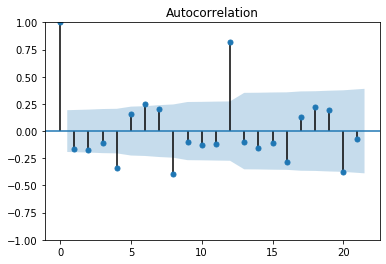

In [32]:
plot_acf(df['LogSales'].diff().dropna());

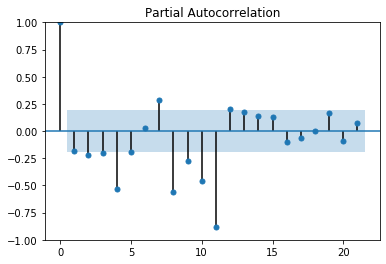

In [33]:
plot_pacf(df['LogSales'].diff().dropna(), method='ols');

In [34]:
from statsmodels.tsa.stattools import adfuller

In [35]:
adfuller(df['LogSales'])

(-2.2551186012844227,
 0.1868517311168746,
 13,
 91,
 {'1%': -3.50434289821397,
  '5%': -2.8938659630479413,
  '10%': -2.5840147047458037},
 -49.19143751582993)

In [36]:
adfuller(df['LogSales'].diff().dropna())

(-4.460914465253655,
 0.0002312140464953381,
 12,
 91,
 {'1%': -3.50434289821397,
  '5%': -2.8938659630479413,
  '10%': -2.5840147047458037},
 -43.63799632128641)

In [38]:
def plot_fit_and_forecast(result, d=0, col='Sales'):
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(df[col], label='data')

    # plot the curve fitted on train set
    train_pred = result.fittedvalues
    ax.plot(train.index, train_pred, color='green', label='fitted')

    # forecast the test set
    prediction_result = result.get_forecast(Ntest)
    conf_int = prediction_result.conf_int()
    lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
    forecast = prediction_result.predicted_mean
    ax.plot(test.index, forecast, label='forecast')
    ax.fill_between(test.index, \
                    lower, upper,
                    color='red', alpha=0.3)
    ax.legend()
    return forecast

/Users/maria/opt/miniconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/maria/opt/miniconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/maria/opt/miniconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


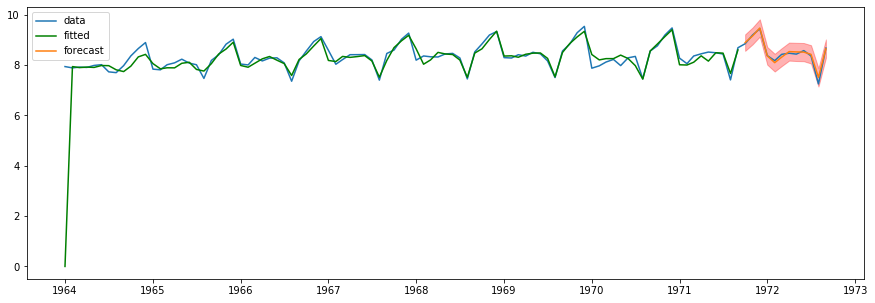

In [39]:
arima = ARIMA(train['LogSales'], order=(12,1,2))
arima_result = arima.fit()
forecast = plot_fit_and_forecast(arima_result, d=1, col='LogSales')

In [40]:
r2_score(test['Sales'], np.exp(forecast))

0.9865741528850348